# Import packages

In [1]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

import importlib
import time
from sklearn.datasets import make_hastie_10_2
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import os

# Load Data via Pandas

In [6]:
# preprocess = "trimmed"
preprocess = "untrimmed"

HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN/"
Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"


total_list = ["GEN","SHO","PRO",
              "MJ_0","PTJ_0","t21_0","D21_0","D22_0","C21_0","C22_0",
              "MJ","PTJ","t21","D21","D22","C21","C22",
              "eventindex","index"]

if os.path.exists(HOMEPATH + "Data_ML/BDT" + "_" + str(preprocess)) == 0:
    os.mkdir(HOMEPATH + "Data_ML/BDT" + "_" + str(preprocess))
    datapath = HOMEPATH + "Data_ML/"
    savepath = HOMEPATH + "Data_ML/BDT" + "_" + str(preprocess) + "/"
else: 
    datapath = HOMEPATH + "Data_ML/"
    savepath = HOMEPATH + "Data_ML/BDT" + "_" + str(preprocess) + "/"

herwig_ang_train = pd.read_csv(datapath + "herwig_ang_train" + "_" + str(preprocess) + ".csv")
herwig_ang_test = pd.read_csv(datapath + "herwig_ang_test" + "_" + str(preprocess) + ".csv")
herwig_ang_val = pd.read_csv(datapath + "herwig_ang_val" + "_" + str(preprocess) + ".csv")


pythia_def_train = pd.read_csv(datapath + "pythia_def_train" + "_" + str(preprocess) + ".csv")
pythia_def_test = pd.read_csv(datapath + "pythia_def_test" + "_" + str(preprocess) + ".csv")
pythia_def_val = pd.read_csv(datapath + "pythia_def_val" + "_" + str(preprocess) + ".csv")


pythia_vin_train = pd.read_csv(datapath + "pythia_vin_train" + "_" + str(preprocess) + ".csv")
pythia_vin_test = pd.read_csv(datapath + "pythia_vin_test" + "_" + str(preprocess) + ".csv")
pythia_vin_val = pd.read_csv(datapath + "pythia_vin_val" + "_" + str(preprocess) + ".csv")


pythia_dip_train = pd.read_csv(datapath + "pythia_dip_train" + "_" + str(preprocess) + ".csv")
pythia_dip_test = pd.read_csv(datapath + "pythia_dip_test" + "_" + str(preprocess) + ".csv")
pythia_dip_val = pd.read_csv(datapath + "pythia_dip_val" + "_" + str(preprocess) + ".csv")


sherpa_def_train = pd.read_csv(datapath + "sherpa_def_train" + "_" + str(preprocess) + ".csv")
sherpa_def_test = pd.read_csv(datapath + "sherpa_def_test" + "_" + str(preprocess) + ".csv")
sherpa_def_val = pd.read_csv(datapath + "sherpa_def_val" + "_" + str(preprocess) + ".csv")


if preprocess == "trimmed":
    features = ["MJ","t21","D21","D22","C21","C22"]
    
if preprocess == "untrimmed":   
    features = ["MJ_0","t21_0","D21_0","D22_0","C21_0","C22_0"]


BDT_model_name = ["herwig_ang", "pythia_def", "pythia_vin", "pythia_dip", "sherpa_def"]

XTRAIN = [herwig_ang_train[features],pythia_def_train[features],
         pythia_vin_train[features],pythia_dip_train[features],
         sherpa_def_train[features]]

YTRAIN = [herwig_ang_train["target"],pythia_def_train["target"],
         pythia_vin_train["target"],pythia_dip_train["target"],
         sherpa_def_train["target"]]


XVAL = [herwig_ang_val[features],pythia_def_val[features],
         pythia_vin_val[features],pythia_dip_val[features],
         sherpa_def_val[features]]

YVAL = [herwig_ang_val["target"],pythia_def_val["target"],
         pythia_vin_val["target"],pythia_dip_val["target"],
         sherpa_def_val["target"]]


XTEST = [herwig_ang_test[features],pythia_def_test[features],
         pythia_vin_test[features],pythia_dip_test[features],
         sherpa_def_test[features]]

YTEST = [herwig_ang_test["target"],pythia_def_test["target"],
         pythia_vin_test["target"],pythia_dip_test["target"],
         sherpa_def_test["target"]]

print("W jet : QCD jet = 1 : 1")
print("\r")
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default"))
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("Train #",len(herwig_ang_train),len(pythia_def_train),len(pythia_vin_train),len(pythia_dip_train),len(sherpa_def_train)))
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("Test #",len(herwig_ang_test),len(pythia_def_test),len(pythia_vin_test),len(pythia_dip_test),len(sherpa_def_test)))
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("Val. #",len(herwig_ang_val),len(pythia_def_val),len(pythia_vin_val),len(pythia_dip_val),len(sherpa_def_val)))


W jet : QCD jet = 1 : 1

        Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default 
Train #     101222         101222         101222         101222         101222     
 Test #      12652          12652          12652          12652          12652     
 Val. #      12652          12652          12652          12652          12652     


# BDT Training

In [7]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################
# features = ["MJ","t21","D21","D22","C21","C22"]
# features = ["MJ_0","t21_0","D21_0","D22_0","C21_0","C22_0"]


# BDT_model_name = ["herwig_ang", "pythia_def", "pythia_vin", "pythia_dip", "sherpa_def"]

# XTRAIN = [herwig_ang_train[features],pythia_def_train[features],
#          pythia_vin_train[features],pythia_dip_train[features],
#          sherpa_def_train[features]]

# YTRAIN = [herwig_ang_train["target"],pythia_def_train["target"],
#          pythia_vin_train["target"],pythia_dip_train["target"],
#          sherpa_def_train["target"]]

# savepath = HOMEPATH + "Data_ML/BDT" + "_" + str(preprocess)"/"

for i, element in enumerate(BDT_model_name):

    GBDT, Ada = 0, 0
    for j, filename in enumerate(os.listdir(savepath)):
        if filename == BDT_model_name[i]+"_GBDT" + "_" + str(preprocess) + ".h5" :
            GBDT += 1 
#         elif filename == BDT_model_name[i]+"_AdaBoost.h5" :
#             Ada += 1 

    if GBDT == 0:
        rand = np.random.randint(1000000)
        clf_GBDT = GradientBoostingClassifier(
                    n_estimators=1000,
                    learning_rate=0.02,
                    max_depth=2, 
                    min_samples_split = 0.25,
                    min_samples_leaf = 0.05,
        #             min_impurity_split = 0.00001,
        #             validation_fraction = 0.1,
                    random_state= rand,  #np.random,
                    verbose = 0
                    )
        clf_GBDT.fit(XTRAIN[i] ,YTRAIN[i])
        dump(clf_GBDT, savepath + BDT_model_name[i] + "_GBDT" + "_" + str(preprocess) + ".h5")

    ticks_2 = time.time()

    # if Ada == 0:
    #     clf_Ada = AdaBoostClassifier(
    #             DecisionTreeClassifier(max_depth=2),
    #             n_estimators=500,
    #             learning_rate=1)

    #     clf_Ada.fit(XTRAIN[i] ,YTRAIN[i])
    #     dump(clf_Ada, savepath + BDT_model_name[i] + "_AdaBoost.h5")

    if GBDT == 1:
        clf_GBDT = load(savepath + BDT_model_name[i] + "_GBDT" + "_" + str(preprocess) + ".h5")

#     if Ada == 1:
#         clf_Ada = load(savepath + BDT_model_name[i] + "_AdaBoost.h5")

    ############################################################################################################################################################
    ticks_3 = time.time()
    totaltime =  ticks_2 - ticks_1
    print("\033[3;33mTime consumption : {:.4f} min for GBDT\033[0;m".format(totaltime/60.))
#     totaltime =  ticks_3 - ticks_2
#     print("\033[3;33mTime consumption : {:.4f} min for AdaBDT\033[0;m".format(totaltime/60.))


Tue Dec 01 17:21:25 2020
Time consumption : 0.0000 min for GBDT
Time consumption : 0.0007 min for GBDT
Time consumption : 0.0014 min for GBDT
Time consumption : 0.0021 min for GBDT
Time consumption : 0.0027 min for GBDT


# Study the Performance of BDT

In [8]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "W Jet"

BDT_Model = ["herwig_ang", "pythia_def", "pythia_vin", "pythia_dip", "sherpa_def"]
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

XTEST = [herwig_ang_test[features],pythia_def_test[features],
         pythia_vin_test[features],pythia_dip_test[features],
         sherpa_def_test[features]]

YTEST = [herwig_ang_test["target"],pythia_def_test["target"],
         pythia_vin_test["target"],pythia_dip_test["target"],
         sherpa_def_test["target"]]

AUC = np.zeros((5,5))
max_sig = np.zeros((5,5))
r05 = np.zeros((5,5))

for i, model in enumerate(BDT_Model):
#     print(model)
    for j, test_generator in enumerate(XTEST):
        
        clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

        prediction_GBDT_test = clf_GBDT.predict_proba(test_generator)

        discriminator_test = prediction_GBDT_test[:,1]

        discriminator_test = discriminator_test/(max(discriminator_test))

        AUC[i,j] = metrics.roc_auc_score(YTEST[i],discriminator_test)
        FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(YTEST[i],discriminator_test)
        
#         print(len(FalsePositiveFull_GBDT_test),len(TruePositiveFull_GBDT_test),len(YTEST[i]))
#         aaa = np.where(TruePositiveFull > 0.1)
        aaa = np.where(FalsePositiveFull != 0)
#         print(FalsePositiveFull[:aaa[0][0]], TruePositiveFull[:aaa[0][0]])
        max_sig[i,j] = max(TruePositiveFull[aaa]/np.sqrt(FalsePositiveFull[aaa])) 
        bbb = np.where(TruePositiveFull >= 0.5)
        r05[i,j] = 1./FalsePositiveFull[bbb[0][0]]

print("Models are trained by row and test to column.")
print("Performance in AUC")
print("\r")
print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default"))
for i in range(5):
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format(BDT_model_name[i],AUC[i,0], AUC[i,1], AUC[i,2], AUC[i,3], AUC[i,4]))
print("\r")
print("Performance in Max Significance")
print("\r")
for i in range(5):
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format(BDT_model_name[i],max_sig[i,0], max_sig[i,1], max_sig[i,2], max_sig[i,3], max_sig[i,4]))
print("\r")
print("1/fpr @ tpr = 0.5 (rejection at 50% signal efficiency)")
print("\r")
for i in range(5):
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format(BDT_model_name[i],r05[i,0], r05[i,1], r05[i,2], r05[i,3], r05[i,4]))





Models are trained by row and test to column.
Performance in AUC

               Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default 
Herwig Angular      0.880          0.900          0.901          0.884          0.909     
Pythia Default      0.880          0.900          0.901          0.885          0.909     
 Pythia Vincia      0.880          0.901          0.901          0.884          0.909     
 Pythia Dipole      0.879          0.901          0.900          0.885          0.908     
Sherpa Default      0.878          0.899          0.900          0.883          0.909     

Performance in Max Significance

Herwig Angular      6.205          5.717          6.634          6.848          5.278     
Pythia Default      5.299          5.810          6.293          6.621          5.089     
 Pythia Vincia      5.073          5.920          6.751          7.085          5.158     
 Pythia Dipole      5.022          4.973          5.872          6.429          5

# Feature Importances

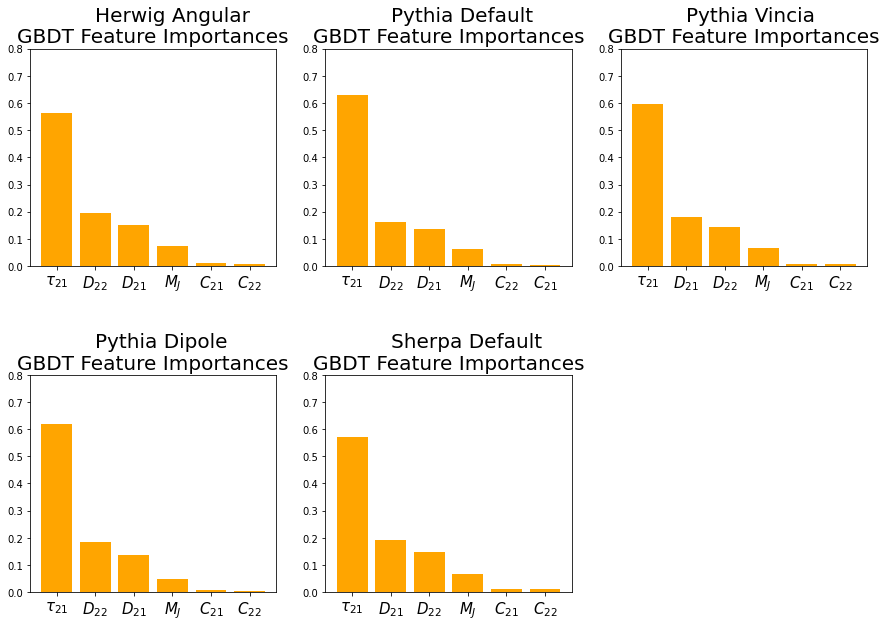

In [9]:
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]
feature_namelist = ["$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$"]

plt.figure(figsize=(15,10))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

    importances = clf_GBDT.feature_importances_
    # std = np.std([tree.feature_importances_ for tree in clf_GBDT.estimators_],
    #              axis=0)
    indices = np.argsort(importances)[::-1]
    namelist_inorder = []
    for index in indices:
        namelist_inorder.append(feature_namelist[index])
    
    plt.title("GBDT Feature Importances",fontsize=20)

    plot_axis.bar(range(XTRAIN[i].shape[1]), 
             importances[indices],
             color="orange", 
    #          yerr=std[indices], 
             align="center")
    
    plot_axis.set_ylim((0,0.8))
    plot_axis.text(x=1, y=0.9, s=str(BDT_model_name[i]),fontsize=20) 
    plot_axis.set_xticks([0,1,2,3,4,5])
    plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)
    

#     plot_axis.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
#     plot_axis.grid(True)
    

# plt.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
# plt.xlim([-1, X_train.shape[1]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

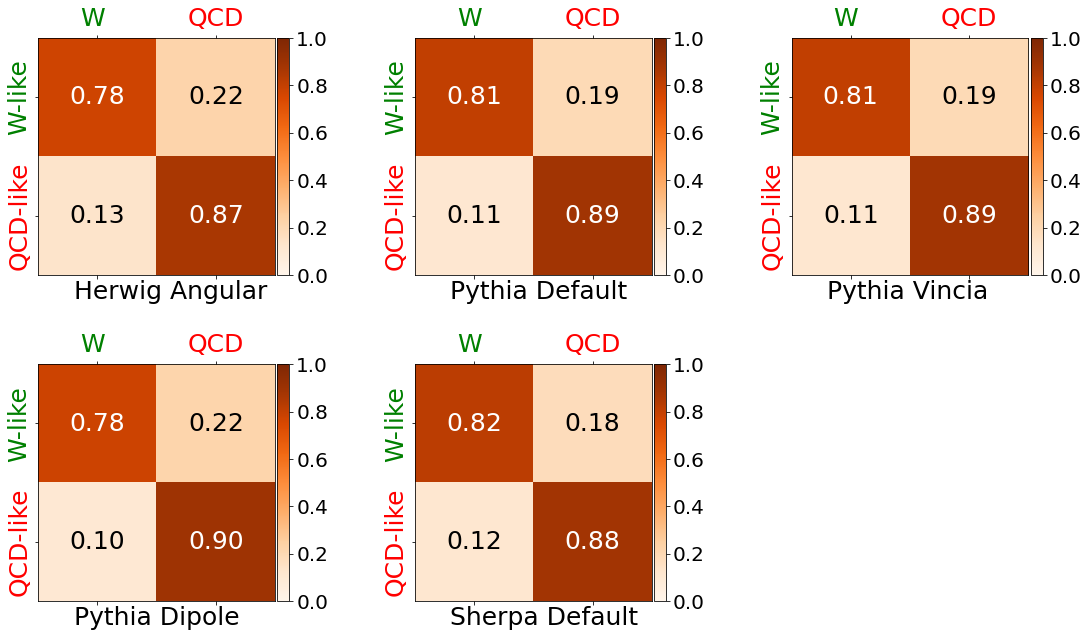

In [10]:
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]
feature_namelist = ["$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$"]

plt.figure(figsize=(18,12))
for index, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,index+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")
    confusion = confusion_matrix(YTEST[index], clf_GBDT.predict(XTEST[index]))
    
 

    ratio, eff = np.zeros(16), np.zeros(16)
    k = 0
    for i in range(2):
        for j in range(2):
            ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
            eff[k] = (confusion[i][j]/np.sum(confusion,axis=1)[i])*100.
            k += 1

#     print("{:^8}  {:^8} {:^8} {:^9} {:^9} ".format("","No ratio","Yes ratio","No eff.","Yes eff."))
#     print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} ".format("No-like",ratio[0],ratio[1],eff[0],eff[2]))
#     print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} ".format("Yes-like",ratio[2],ratio[3],eff[1],eff[3]))

    truelist = ["W ","QCD"]
    likelist = ["W-like","QCD-like"]

    s = len(truelist)
#     f, ax = plt.subplots(1,1, figsize=(s+5, s+5))

    confusion_ = np.array([[ ratio[0],ratio[1]],
                           [ ratio[2],ratio[3]]])/100.

    aa = plot_axis.matshow(confusion_, cmap="Oranges",vmin=0, vmax=1)

    divider = make_axes_locatable(plot_axis)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(aa, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    plot_axis.set_xticks(range(confusion_.shape[1]))
    plot_axis.set_xticklabels(truelist, fontsize=25, rotation=0)
    plot_axis.set_yticks(range(confusion_.shape[1]))
    plot_axis.set_yticklabels(likelist, fontsize=25, rotation=90, verticalalignment ="center")
    my_colors = ["green","red","blue","magenta"]

    for ticklabel, tickcolor in zip(plot_axis.get_xticklabels(), my_colors):
        ticklabel.set_color(tickcolor)

    for ticklabel, tickcolor in zip(plot_axis.get_yticklabels(), my_colors):
        ticklabel.set_color(tickcolor)

    for (i, j), z in np.ndenumerate(confusion_):
        if z >=0.5:
            colors = "white"
        elif z <= -0.5:
            colors = "red"
        else :
            colors = "black"
        plot_axis.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',fontsize=25,color=colors)
    
    
#     plot_axis.text(0.2, -0.8, "True", color = "green",fontsize=25)
#     plot_axis.text(-1.1, 1.2, "Predicted", color = "blue", rotation=90,fontsize=25)
    plot_axis.text(x=-0.2, y=1.7, s=str(BDT_model_name[index]),fontsize=25) 


    


# plt.tight_layout()
# plt.savefig("./Figures/confusion_matrix.pdf", transparent=True, bbox_inches='tight', pad_inches=0)
plt.subplots_adjust(wspace=0.5, hspace=0.0)
plt.show()

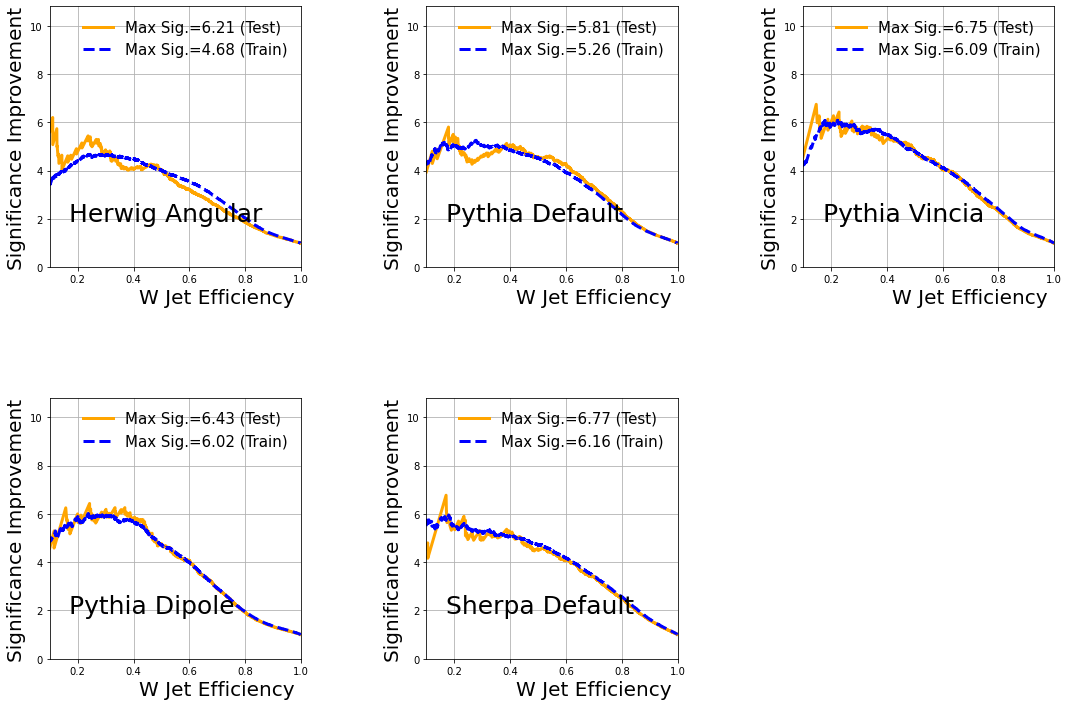

In [11]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "W Jet"

plt.figure(figsize=(18,12))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

#     plot_axis.text(x=1, y=0.7, s=str(BDT_model_name[i]),fontsize=20) 
#     plot_axis.set_xticks([0,1,2,3,4,5])
#     plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)


    prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
    prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])


    # prediction_Ada_test = clf_Ada.predict_proba(X_test)
    # prediction_Ada_train = clf_Ada.predict_proba(X_train)


    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_GBDT_test = metrics.roc_auc_score(YTEST[i],discriminator_test)
    FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(YTEST[i],discriminator_test)

    train_auc_GBDT_train = metrics.roc_auc_score(YTRAIN[i],discriminator_train)
    FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(YTRAIN[i],discriminator_train)
 
    # plt.plot(TruePositiveFull_GBDT_test,1./FalsePositiveFull_GBDT_test,"--", color='b', linewidth = 5, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))
#     a = np.where(TruePositiveFull_GBDT_test > 0.1)
#     b = np.where(TruePositiveFull_GBDT_train > 0.1)
    a = np.where(FalsePositiveFull_GBDT_test != 0)
    b = np.where(FalsePositiveFull_GBDT_train != 0)
    
    max_sig_test = max(TruePositiveFull_GBDT_test[a]/np.sqrt(FalsePositiveFull_GBDT_test[a]))
    max_sig_train = max(TruePositiveFull_GBDT_train[b]/np.sqrt(FalsePositiveFull_GBDT_train[b]))
    plt.plot(TruePositiveFull_GBDT_test[a],TruePositiveFull_GBDT_test[a]/np.sqrt(FalsePositiveFull_GBDT_test[a]),"-", color='orange', linewidth = 3, label='Max Sig.={0:.2f} (Test)'.format(max_sig_test))
    plt.plot(TruePositiveFull_GBDT_train[b],TruePositiveFull_GBDT_train[b]/np.sqrt(FalsePositiveFull_GBDT_train[b]),"--", color='b', linewidth = 3, label='Max Sig.={0:.2f} (Train)'.format(max_sig_train))

# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0.1,1))
    plot_axis.set_ylim((0,10.8))
    # plt.yscale("log")
    plt.xlim((0,1))
#     plt.ylim((1, 1E+4))
#     plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel(str(process)+' Efficiency ', fontsize=20,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('Significance Improvement', fontsize=20,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
    plot_axis.text(x=0.17, y=1.9, s=str(BDT_model_name[i]),fontsize=25) 
    #     plt.tight_layout()

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((1, 2E+2))
#     plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

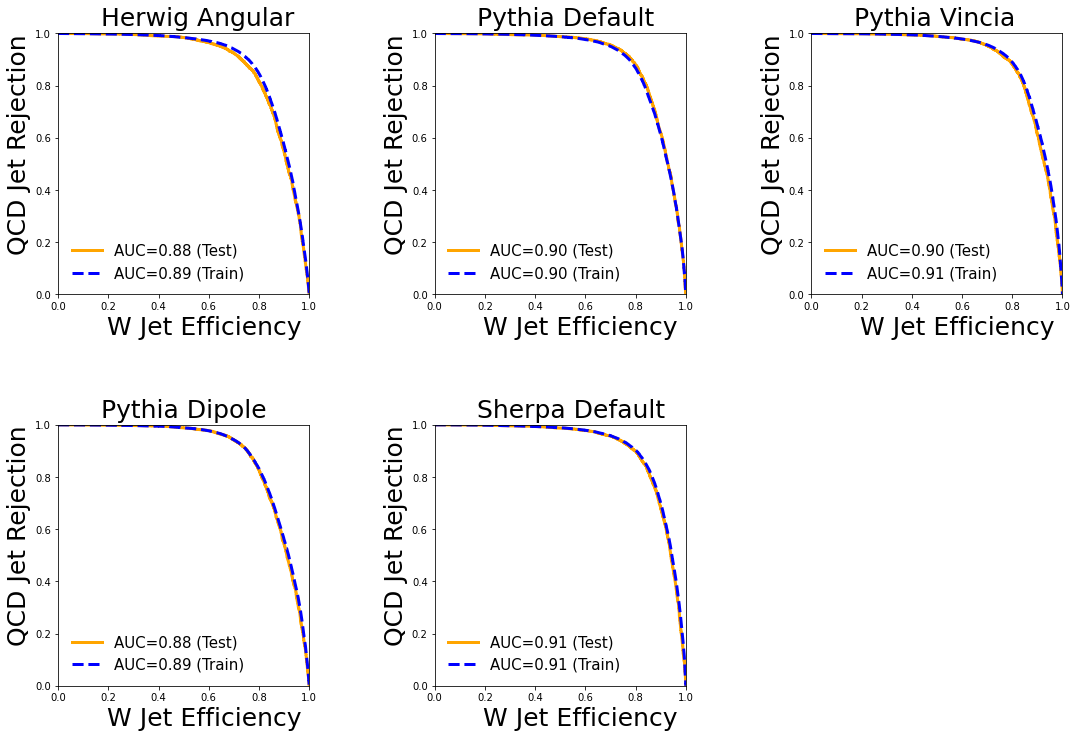

In [12]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "W Jet"

    
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

plt.figure(figsize=(18,12))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

#     plot_axis.text(x=1, y=0.7, s=str(BDT_model_name[i]),fontsize=20) 
#     plot_axis.set_xticks([0,1,2,3,4,5])
#     plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)


    prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
    prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])


    # prediction_Ada_test = clf_Ada.predict_proba(X_test)
    # prediction_Ada_train = clf_Ada.predict_proba(X_train)


    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_GBDT_test = metrics.roc_auc_score(YTEST[i],discriminator_test)
    FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(YTEST[i],discriminator_test)

    train_auc_GBDT_train = metrics.roc_auc_score(YTRAIN[i],discriminator_train)
    FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(YTRAIN[i],discriminator_train)
 
    # plt.plot(TruePositiveFull_GBDT_test,1./FalsePositiveFull_GBDT_test,"--", color='b', linewidth = 5, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))

    plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
    plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
#     plt.plot(TruePositiveFull_GBDT_test[50:]/(FalsePositiveFull_GBDT_test[50:])**0.5, label="aaa") 


# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0,1))
    plot_axis.set_ylim((0,1))
    # plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel(str(process)+' Efficiency ', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('QCD Jet Rejection', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
    plot_axis.text(x=0.17, y=1.03, s=str(BDT_model_name[i]),fontsize=25) 

# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

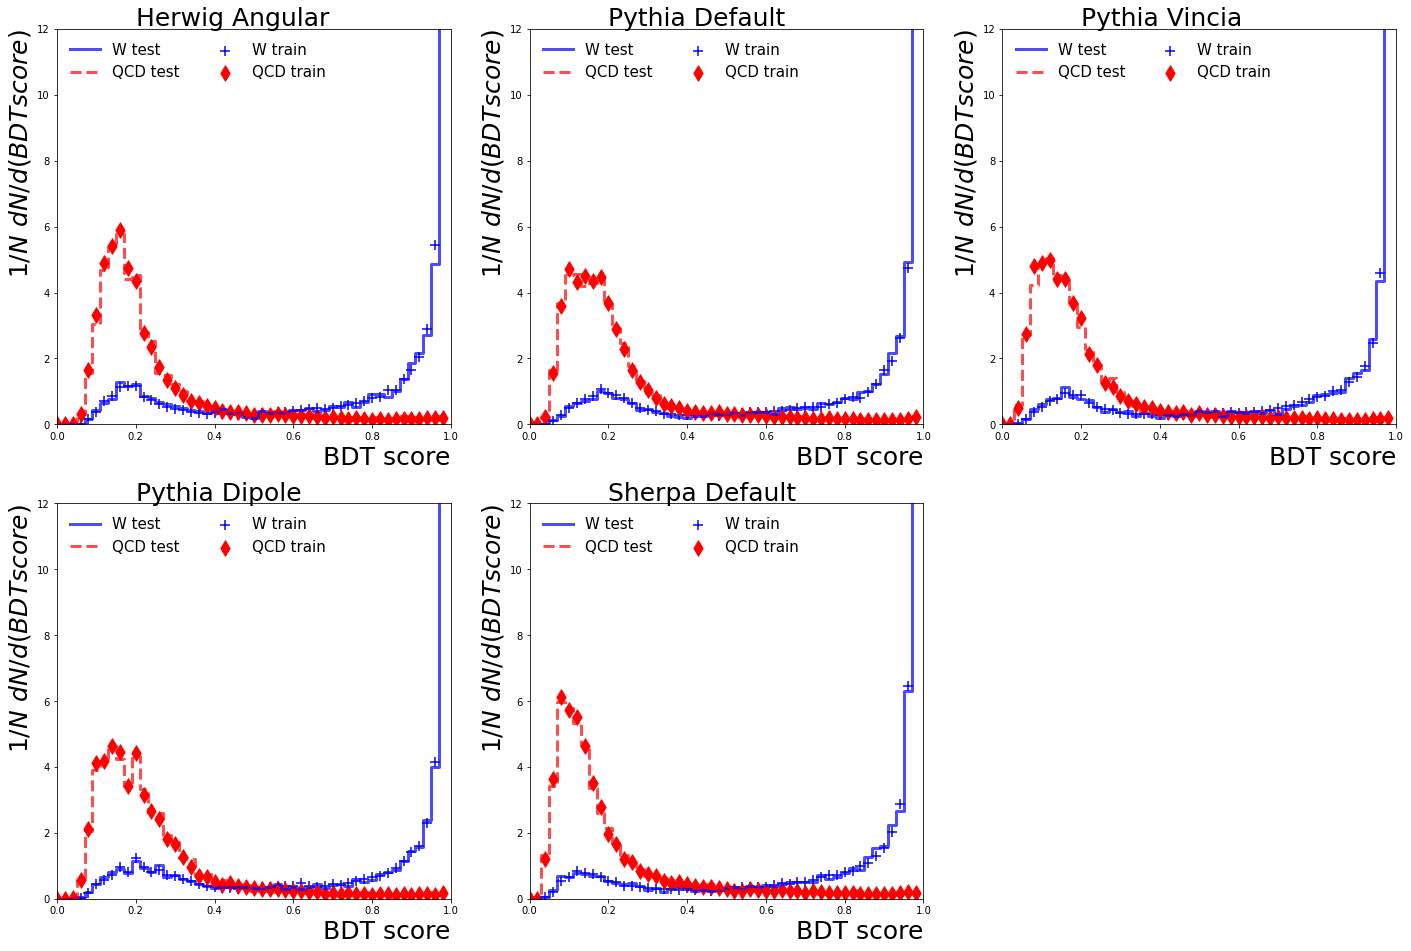

In [13]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "W Jet"

    
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

plt.figure(figsize=(24,16))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")
    
    prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
    prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])
    
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))

    xbin = np.linspace(0,1,51)
    Datatest = pd.DataFrame()
    Datatest["target"] = to_categorical(YTEST[i])[:,axis]
    Datatest["pre"] = discriminator_test
    inner = Datatest[Datatest["target"]==1]
    outter = Datatest[Datatest["target"]==0]

    W_hist, W_bins = np.histogram(inner["pre"], bins=xbin)
    plot_axis.step(W_bins[:-1], W_hist.astype(np.float32)/sum(W_hist)/0.02, "-",color = "blue", where='mid',linewidth=3, alpha=0.7,label="W test") 
    QCD_hist, QCD_bins = np.histogram(outter["pre"], bins=xbin)
    plot_axis.step(QCD_bins[:-1], QCD_hist.astype(np.float32)/sum(QCD_hist)/0.02, "--",color = "red", where='mid',linewidth=3, alpha=0.7,label="QCD test") 


    Datatrain = pd.DataFrame()
    Datatrain["target"] = to_categorical(YTRAIN[i])[:,axis]
    Datatrain["pre_train"] = discriminator_train
    inner = Datatrain[Datatrain["target"]==1]
    outter = Datatrain[Datatrain["target"]==0]

    W_hist, W_bins = np.histogram(inner["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
    plot_axis.scatter(W_bins[:-1], W_hist.astype(np.float32)/sum(W_hist)/0.02 ,marker = "+",c ="b",s=120,label="W train")
    QCD_hist, QCD_bins = np.histogram(outter["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
    plot_axis.scatter(QCD_bins[:-1], QCD_hist.astype(np.float32)/sum(QCD_hist)/0.02 ,marker = "d",c ="r",s=120,label="QCD train")
    
    

    plot_axis.set_xlim(0,1)
    plot_axis.set_ylim(0,12)
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
    plot_axis.set_xlabel("BDT score", fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(loc="best",ncol=2,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0)
    plot_axis.text(x=0.2, y=12.1, s=str(BDT_model_name[i]),fontsize=25) 
        
# plt.savefig("./Higgs_Pt/BDT_score.pdf", transparent=True)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()